# 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

## LinearRegression
LinearRegression 클래스는 예측값과 실제값의 RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스  
fit()메서드로 X,y배열을 입력받으면 회귀 계수인 w를 coef_ 속성에 저장  
<br>
입력 파라미터  
fit_intercept: 불린 값(디폴트 True), 절편 값을 계산할 것인지 지정, False이면 intercept가 사용되지 않고 0으로 지정  
normalize: 불린 값(디폴트 False), fit_intercept가 False인 경우에는 이 파라미터가 무시됨, True이면 회귀 수행 전 입력 데이터셋 정규화  
<br>
속성  
coef_: fit()메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성  
intercept_: intercept 값

OLS 기반 회귀 계수 계산은 피처의 독립성에 많은 영향을 받음  
피처간 상관계수가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감해짐(다중공선성 문제)  
일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요 피처만 남기고 제거하거나 규제를 적용, 매우 많은 피처가 다중 공선성문제를 갖고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려

최신 버전 사이킷런에서 RMSE를 구하려면 men_squared_error(실제값, 예측값, squared = False)를 이용해서 계산

cross_val_score, GridSearchCV와 같은 scoring 함수에 회귀 평가 지표 적용시 주의)  
사이킷런의 scoring함수는 score가 클수록 좋은 평가 결과로 자동평가하기 때문에 -1을 원래 평가 지표 값에 곱해 음수를 만들어 작은 오류값이 더 큰 숫자로 인식하게 함

## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bostonDF = pd.DataFrame(data, columns = columns)
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


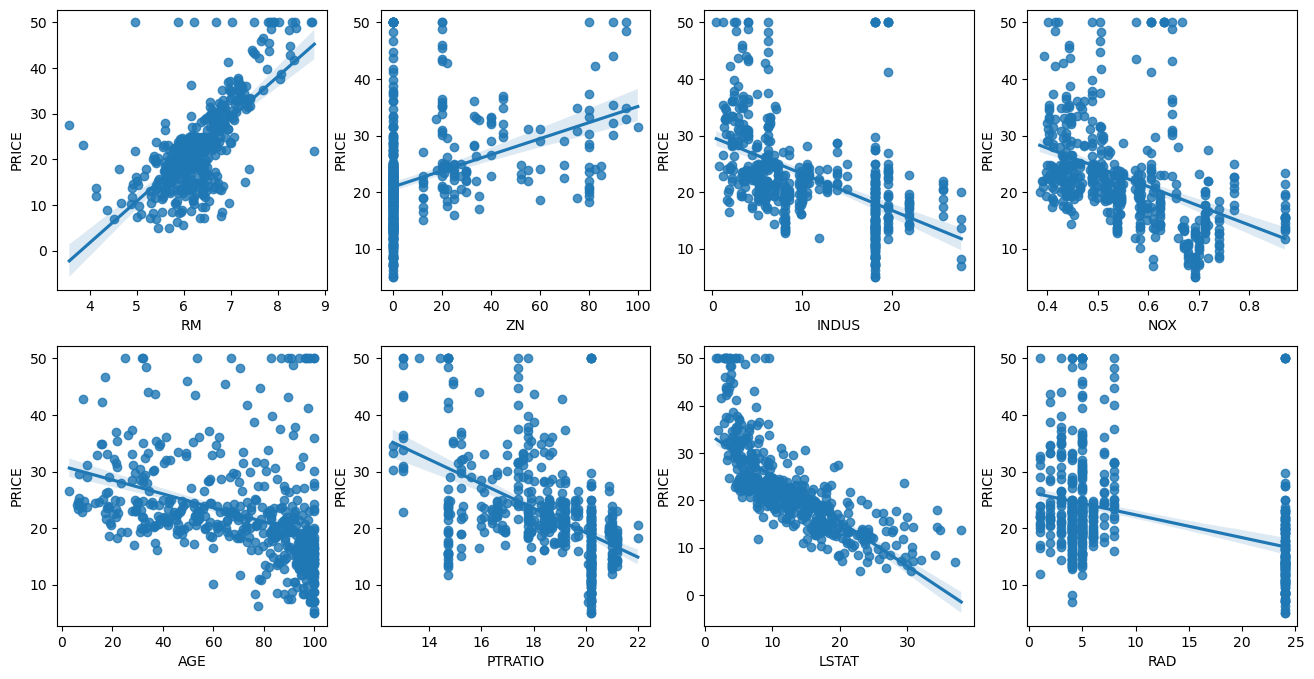

In [4]:
# 2개의 행과 4개의 열을 가진 subplots을 이용, axs는 4*2개의 ax를 가짐
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

In [5]:
#LinearRegression 클래스를 이용해 보스턴 주택 가격 회귀 모델 만들기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

#선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [6]:
#절편, 회귀 계수 값 확인
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.99559517216436
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [7]:
#coef_속성을 피처별 회귀 계수 값으로 매핑하고 높은 순으로 출력
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [8]:
#교차 검증을 통해 MSE, RMSE 측정
from sklearn.model_selection import cross_val_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)
lr = LinearRegression()

#cross_val_score()로 5 폴드 세트를 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt( -1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds의 개별 Negative MSE score: ', np.round(neg_mse_scores,2))
print(' 5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE score:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds의 평균 RMSE: 5.829
